<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

# Section: Importing modules

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display
import IPython.core.display as di
from IPython.core.interactiveshell import InteractiveShell

In [2]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000) 
InteractiveShell.ast_node_interactivity = "all" 

This text is used to hide the code cell when exported in html

In [3]:
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

In [4]:
get_ipython().magic('matplotlib inline')  # Activate that line to use in Jupyter 
matplotlib.rcParams['figure.figsize'] = (15.0, 8.0)

In [5]:
# Loading dataset

In [6]:
df =  pd.read_csv('./2018/data/public_data.csv')

The total of participant after cleaning the dataset. Remove all participants that have not passed the first page.

In [7]:
len(df)

366

In [8]:
df['socio1._.In which country do you work?'].value_counts()

United Kingdom of Great Britain and Northern Ireland    202
Australia                                                72
United States of America                                 21
Germany                                                  18
New Zealand                                              13
Netherlands                                              12
Czech Republic                                            4
Norway                                                    4
South Africa                                              4
Belgium                                                   3
Denmark                                                   2
France                                                    2
Ireland                                                   2
Canada                                                    2
Spain                                                     2
Greece                                                    1
Japan                                   

In [9]:
df['socio1._.In which country do you work?'].replace({'United Kingdom of Great Britain and Northern Ireland': "United Kingdom",
            'United States of America': 'United States'}, inplace=True)
df_countries = df['socio1._.In which country do you work?'].value_counts().to_frame().reset_index()
df_countries.columns = ['name', 'count'] 

In [10]:
df_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# Merge datasets together and replace nan with 0
df_map = df_map.merge(df_countries, on='name', how='outer')
df_map.fillna(0, inplace=True)
#df_map.plot()

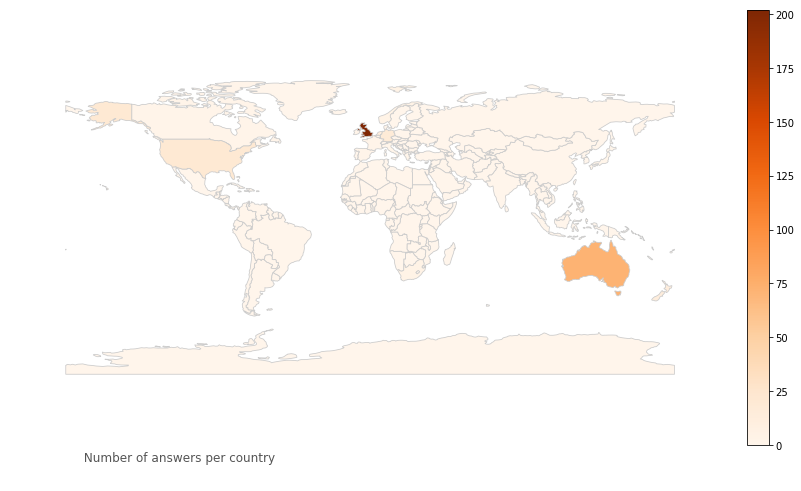

In [16]:

fig, ax = plt.subplots(1)
ax = df_map.plot(ax=ax, column='count', cmap='Oranges', linewidth=0.8, edgecolor='0.8', legend=True)


# Add the description
description = """ Number of answers per country"""
plot = ax.annotate(description, xy=(0.1, .08), xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')

# Remove axis
plot = ax.axis('off')

plt.show()